In [15]:
# Libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230  30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 254 254 244  20 

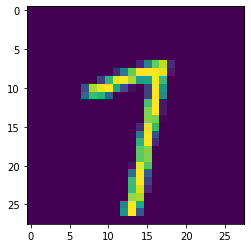

In [16]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

# Loading Dataset            
mnist = tf.keras.datasets.mnist

# Splitting datas for training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# displaying an image from the Dataset
np.set_printoptions(linewidth=200)
plt.imshow(x_train[42])
print(y_train[42])
print(x_train[42])

# Normalization
x_train, x_test = x_train/255.0, x_test/255.0
callbacks = myCallback()

# Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

#Compile model with Loss function and Optimizer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Model fitting
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])


In [17]:
# Evaluate model with test dataset
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.0715 - accuracy: 0.9807


[0.07149030336715514, 0.9807]

Enter the image number: 903
[1.38769458e-08 3.35987238e-10 3.55637741e-09 5.46590506e-08 1.07750275e-05 4.41819702e-06 9.99559224e-01 3.73667319e-10 4.25281818e-04 2.47537997e-07]
6


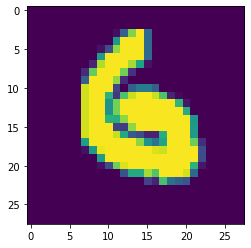

In [25]:
# Model Classification Example
classification = model.predict(x_test)
imgNum = int(input("Enter the image number: "))
print(classification[imgNum])
plt.imshow(x_test[imgNum])
print(y_test[imgNum])